In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pylab
# .imshow(image) - выводит изображение на экран

In [2]:
from sklearn.cluster import KMeans
#Кластеры. Обучение без учителя

In [4]:
from sklearn.metrics import mean_squared_error

In [6]:
import skimage

In [8]:
image = sp.misc.imread('parrots.jpg')

In [12]:
image_float = skimage.img_as_float(image)

In [16]:
cluster = KMeans(init='k-means++', random_state=241)

In [41]:
r = image_float[:,:,0].ravel()
g = image_float[:,:,1].ravel()
b = image_float[:,:,2].ravel()

img_rgb_arr = np.vstack((r,g,b)).transpose()

In [128]:
image_float.shape

(474, 713, 3)

In [58]:
cluster.fit(img_rgb_arr)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=241, tol=0.0001,
    verbose=0)

In [116]:
def mean_median(img_rgb_arr,cluster):
    means = []
    medians = []
    for i in range(cluster.n_clusters):
        means.append(np.mean(img_rgb_arr[cluster.labels_ == i], axis=0))
        medians.append(np.median(img_rgb_arr[cluster.labels_ == i], axis=0))
    mean_cluster = np.asarray(means)
    median_cluster = np.asarray(medians)
    return (mean_cluster,median_cluster)

In [99]:
img_mean_arr = mean_cluster[cluster.labels_]
img_median_arr = median_cluster[cluster.labels_]

In [114]:
def PSNR(X_new,X_old):
    MSE = np.sum(np.sum((X_new - X_old)**2)) /(X_new.shape[0] * X_new.shape[1])
    return 10 * np.log10(np.max(X_old) / MSE)

In [121]:
import time

In [123]:
clusters = []
medians = []
means = []
for k in range(1,21):
    start = time.time()
    clstr = KMeans(init='k-means++', random_state=241,n_clusters=k)
    clstr.fit(img_rgb_arr)
    clusters.append(clstr)
    mean, median = mean_median(img_rgb_arr,clstr)
    means.append(mean)
    medians.append(median)
    stop = time.time()
    print k,' kernal done! ','%.5f'% (stop - start)

1  kernal done!  2.94200
2  kernal done!  16.79300
3  kernal done!  30.14100
4  kernal done!  42.52000
5  kernal done!  50.82900
6  kernal done!  58.00800
7  kernal done!  62.53700
8  kernal done!  74.85200
9  kernal done!  109.62600
10  kernal done!  126.07600
11  kernal done!  187.89500
12  kernal done!  207.07100
13  kernal done!  202.38100
14  kernal done!  275.57500
15  kernal done!  268.60900
16  kernal done!  290.38500
17  kernal done!  266.77400
18  kernal done!  420.97900
19  kernal done!  310.12400
20  kernal done!  389.34200


In [125]:
means

[array([[ 0.38014665,  0.48210102,  0.28545355]]),
 array([[ 0.71898549,  0.60727465,  0.48672372],
        [ 0.1298638 ,  0.38964168,  0.1367856 ]]),
 array([[ 0.12641988,  0.62674277,  0.24587825],
        [ 0.76024107,  0.62971545,  0.52003425],
        [ 0.22664267,  0.1412431 ,  0.055385  ]]),
 array([[ 0.11060882,  0.14763501,  0.05525219],
        [ 0.71192385,  0.58521137,  0.69947016],
        [ 0.84159835,  0.54566231,  0.06942989],
        [ 0.14217864,  0.63122047,  0.25233996]]),
 array([[ 0.10014844,  0.14396101,  0.05231466],
        [ 0.9326828 ,  0.80990556,  0.05337882],
        [ 0.70733038,  0.19340777,  0.37680384],
        [ 0.12637632,  0.62801877,  0.23260815],
        [ 0.67165756,  0.7831677 ,  0.71398338]]),
 array([[ 0.27100279,  0.61206512,  0.48565359],
        [ 0.78739032,  0.08512348,  0.4303882 ],
        [ 0.90254353,  0.77512925,  0.06806499],
        [ 0.10286494,  0.63431629,  0.06467098],
        [ 0.75746687,  0.80067549,  0.76130337],
        [ 

In [126]:
for i in range(20):
    img_mean_arr = means[i][clusters[i].labels_]
    img_median_arr = medians[i][clusters[i].labels_]
    print i+1,PSNR(img_mean_arr,img_rgb_arr),PSNR(img_median_arr,img_rgb_arr)

1 9.86639473003 9.50345176791
2 12.1450144894 11.7227475508
3 13.2081123621 12.6883899134
4 14.4163028381 14.0548998866
5 15.5908773714 15.2488696906
6 16.6066369627 16.1154974417
7 17.6989010472 17.3997303195
8 18.4845821212 18.179628991
9 19.166784755 18.8779052717
10 19.6967425824 19.4702552578
11 20.1824248736 19.9051500033
12 20.651884151 20.3609362314
13 21.0770050834 20.8570424354
14 21.3532203558 21.1131283775
15 21.6335356887 21.3978426786
16 21.9185789256 21.733386256
17 22.177161861 21.9776840932
18 22.3893640174 22.1967653093
19 22.5767839227 22.4168867289
20 22.7720595804 22.6207515044


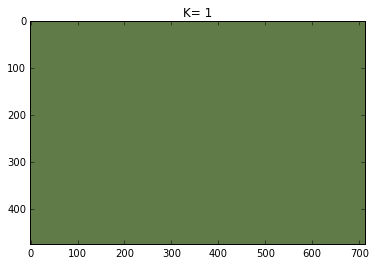

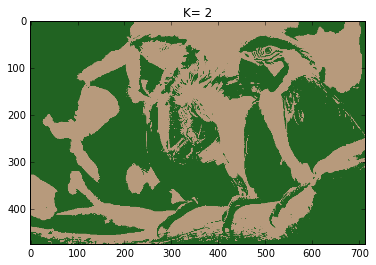

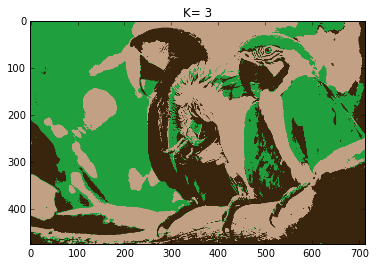

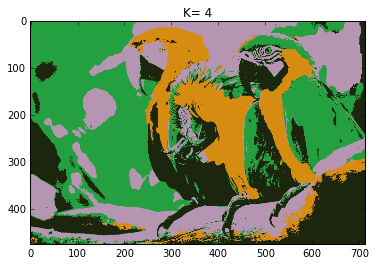

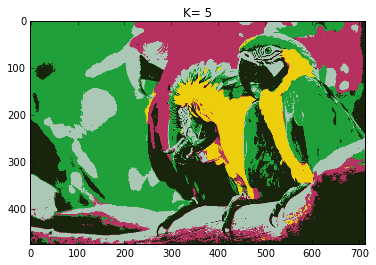

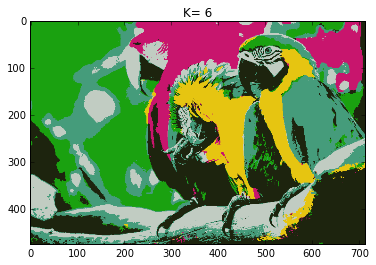

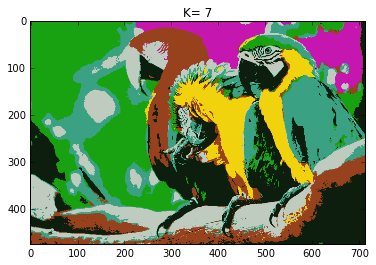

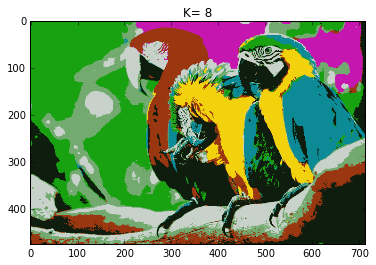

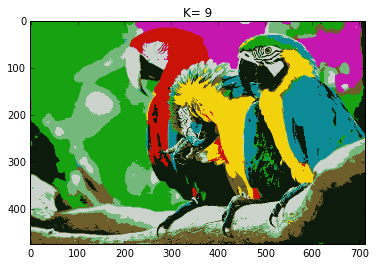

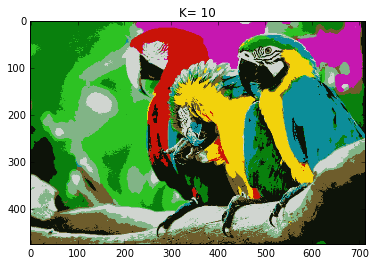

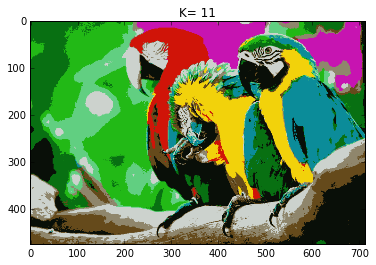

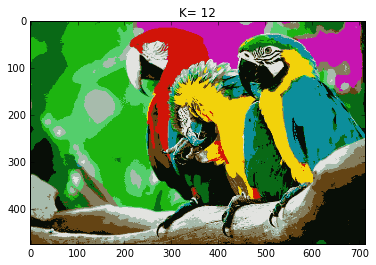

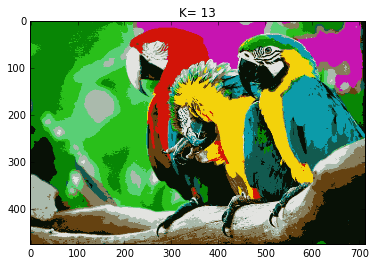

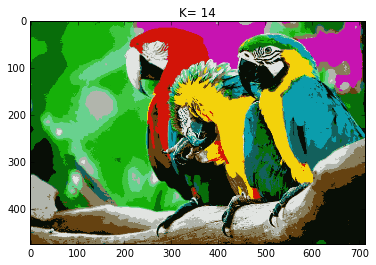

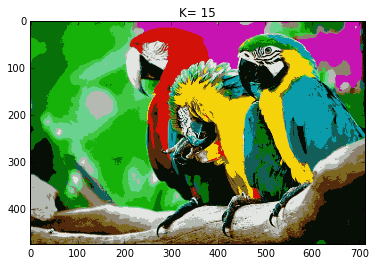

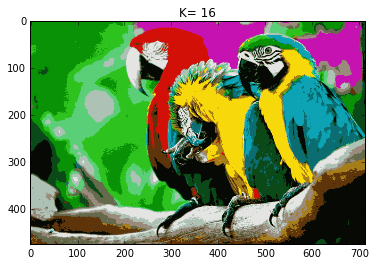

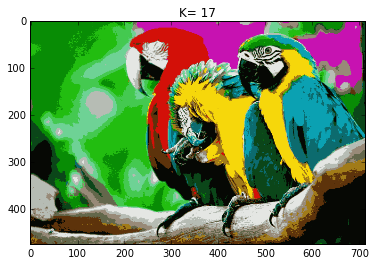

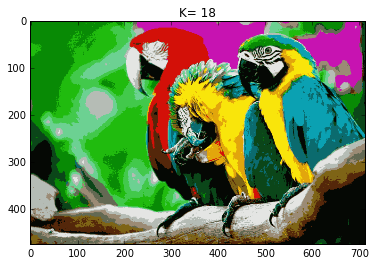

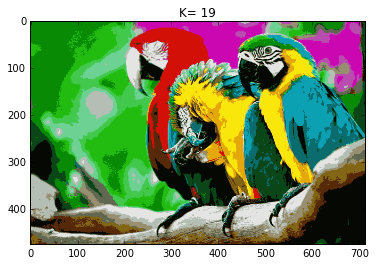

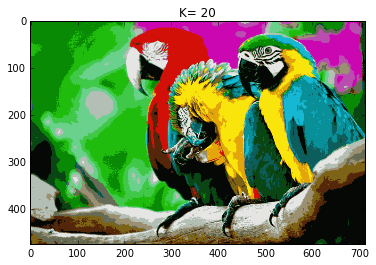

In [136]:
for i in range(20):
    cls = clusters[i].labels_.reshape(image_float.shape[0],image_float.shape[1])
    new_img = means[i][cls]
    plt.figure()
    plt.title('K= %s'% (i+1))
    plt.imshow(new_img)
    plt.show()